In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [2]:
import zipfile
from subprocess import check_output
train_data = "train.csv"
feature_data="features.csv"
test_data="test.csv"

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

with zipfile.ZipFile("../input/walmart-recruiting-store-sales-forecasting/"+train_data+".zip","r") as z:
    z.extractall(".")
print(check_output(["ls", "train.csv"]).decode("utf8"))
train_df=pd.read_csv("train.csv")
#train_df = pd.read_csv("train.csv", parse_dates=['Date'], date_parser=dateparse,index_col=['Date'])

with zipfile.ZipFile("../input/walmart-recruiting-store-sales-forecasting/"+feature_data+".zip","r") as z:
    z.extractall(".")

print(check_output(["ls", "features.csv"]).decode("utf8"))
#feature_df=pd.read_csv("features.csv",parse_dates=['Date'], date_parser=dateparse,index_col=['Date'])
feature_df=pd.read_csv("features.csv")
store_df=pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/stores.csv")

# with zipfile.ZipFile("../input/walmart-recruiting-store-sales-forecasting/"+test_data+".zip","r") as z:
#     z.extractall(".")

# print(check_output(["ls", "test.csv"]).decode("utf8"))
# #test_df=pd.read_csv("test.csv",parse_dates=['Date'], date_parser=dateparse,index_col=['Date'])
# test_df=pd.read_csv("test.csv")



train_df=pd.merge(train_df, store_df, on='Store')
train_df=pd.merge(train_df, feature_df, on=['Store','Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'],format='%Y/%m/%d')


train_df['Month'] = train_df['Date'].apply(lambda x: x.month)
# category_dummies=pd.get_dutmmies(train_df[['Month']],prefix=['Month'])
# train_df=pd.concat([train_df,category_dummies],axis=1).drop(['Month'],axis=1)


train_df.to_csv("final_df.csv",index=False)
train_df = pd.read_csv("final_df.csv",index_col=['Date'])
#setting date as index for ordered data
train_df['IsHoliday_x'] = train_df['IsHoliday_x'].apply(lambda x: 1 if x==True else 0)
category_dummies=pd.get_dummies(train_df[['Type']],prefix=['Type'])
train_df=pd.concat([train_df,category_dummies],axis=1).drop(['Type'],axis=1)
train_df=train_df.drop(["IsHoliday_y"],axis=1)


category_dummies=pd.get_dummies(train_df['Month'],prefix='month')
train_df=pd.concat([train_df,category_dummies],axis=1).drop(['Month'],axis=1)



train.csv

features.csv



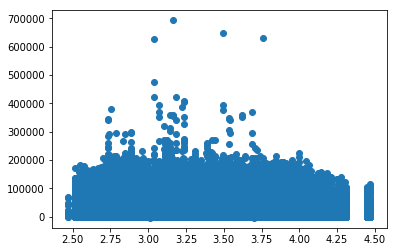

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(train_df['Fuel_Price'] , train_df['Weekly_Sales'])


In [ ]:
plt.figure()
plt.scatter(train_df['CPI'] , train_df['Weekly_Sales'])


In [ ]:
plt.figure()
plt.scatter(train_df['Unemployment'] , train_df['Weekly_Sales'])


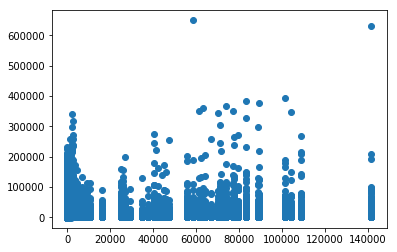

In [5]:
plt.figure()
plt.scatter(train_df['MarkDown3'] , train_df['Weekly_Sales'])


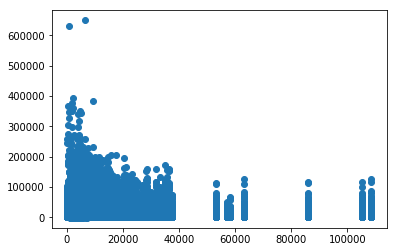

In [6]:
plt.figure()
plt.scatter(train_df['MarkDown5'] , train_df['Weekly_Sales'])

In [ ]:
#Removing Irevelant Coloumns which have little or no impact on target variable

train_df=train_df.drop(['CPI','Fuel_Price','Unemployment'],axis=1)

#Coloumns missing from the test data, repeated modelling with various combinations also showed Markdown3 adds very little varince to our data hence removing it
train_df=train_df.drop(['month_8','month_9','month_10','MarkDown3'],axis=1)



from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
x_train, x_val, y_train, y_val = train_test_split(train_df.drop(columns = ['Weekly_Sales']), 
                                                    train_df['Weekly_Sales'], 
                                                    test_size=0.2, 
                                                    random_state=1)
w_train = x_train['IsHoliday_x'].replace(1, 5).replace(0, 1)
w_val=x_val['IsHoliday_x'].replace(1, 5).replace(0, 1)


                                                                            ****Random Forrest****

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfm = RandomForestRegressor(n_estimators = 100,criterion='mse')
rf_xtrain=x_train.fillna(0)
rf_ytrain=y_train.fillna(0)
rf_xval=x_val.fillna(0)
rf_yval=y_val.fillna(0)
rfm.fit(rf_xtrain,rf_ytrain)

In [ ]:



with zipfile.ZipFile("../input/walmart-recruiting-store-sales-forecasting/"+test_data+".zip","r") as z:
    z.extractall(".")

print(check_output(["ls", "test.csv"]).decode("utf8"))
# test_df=pd.read_csv("test.csv",parse_dates=['Date'], date_parser=dateparse,index_col=['Date'])

test_df=pd.read_csv("test.csv")

test_df=pd.merge(test_df, store_df, on='Store')
test_df=pd.merge(test_df, feature_df, on=['Store','Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'],format='%Y/%m/%d')

test_df['Month'] = test_df['Date'].apply(lambda x: x.month)

test_df.to_csv("final_test_df.csv",index=False)
test_df = pd.read_csv("final_test_df.csv",index_col=['Date'])
test_df['IsHoliday_x'] = test_df['IsHoliday_x'].apply(lambda x: 1 if x==True else 0)
category_dummies=pd.get_dummies(test_df[['Type']],prefix=['Type'])
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Type'],axis=1)
# test_df.head(5)
test_df=test_df.drop(["IsHoliday_y"],axis=1)
category_dummies=pd.get_dummies(test_df['Month'],prefix='month')
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Month'],axis=1)

test_df=test_df.drop(['CPI','Fuel_Price','Unemployment','MarkDown3'],axis=1)

w_test=test_df['IsHoliday_x'].replace(1, 5).replace(0, 1)

#dtest = xgb.DMatrix(data = test_df,weight=w_test)
#lgb_test = lgb.Dataset(test_df)

# test_data = test_df
# #val_labels = y_val
# test_weight = w_test
# test_dataset = Pool(test_data,weight=test_weight,cat_features=categorical_var)

# test_df['Weekly_Sales']=cat_boost_model.predict(test_dataset)
test_df['Weekly_Sales']=rfm.predict(test_df.fillna(0))
solution_df=test_df
solution_df=solution_df.drop(["IsHoliday_x","Size","Temperature","MarkDown1",'MarkDown2','MarkDown4','MarkDown5','Type_A','Type_B','Type_C'],axis=1)
#solution_df=solution_df.drop(['CPI','Fuel_Price','Unemployment'],axis=1)
solution_df=solution_df[['Store','Dept','Weekly_Sales']]
solution_df['Id']=(solution_df['Store']).astype(str)+"_"+(solution_df['Dept']).astype(str)+'_'+(solution_df.index).astype(str)
solution_df=solution_df.reset_index(drop=True)
solution_df=solution_df.drop(["Store","Dept"],axis=1)
cols = solution_df.columns.tolist()
cols
cols=['Id','Weekly_Sales']
solution_df = solution_df[cols]
solution_df.to_csv("rf_solution3.csv",index=False)
solution_df.shape

In [ ]:
from sklearn.metrics import mean_absolute_error
pred = rfm.predict(rf_xval)
mean_absolute_error(rf_yval, pred,sample_weight=w_val)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(rf_yval, pred))

         ************************************************************************************XGBoost**********************************************************************************

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = x_train, label = y_train,weight=w_train)
dval = xgb.DMatrix(data = x_val, label = y_val,weight=w_val)
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 10000
param = {'max_depth':10,
         'eta': 0.3,
         'silent':1,
         'objective':'reg:squarederror',
         #'disable_default_eval_metric':1,
         'eval_metric': 'mae',
         #'feval':'custom_eval',
          #'gamma': 0.10983,
          'lambda': 200,
          'alpha': 10,
          #'subsample' : 0.78,
          #'min_child_weight': 10,
          #'colsample_bytree' :0.8 
          #,'colsample_bynode' : 0.6
          #,'colsample_bylevel':0.7
          #,'scale_pos_weight' : 0.276,
          'maximize' : 'FALSE',
          'n_jobs' : -1
         #,'base_score' : ???
         #,'max_delta_step' : 5
        }

xgb_model = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 20)

In [ ]:
pred = xgb_model.predict(dval)
mean_absolute_error(y_val, pred,sample_weight=w_val)

In [ ]:
print(r2_score(y_val, pred))

In [ ]:
test_df=pd.read_csv("test.csv")

test_df=pd.merge(test_df, store_df, on='Store')
test_df=pd.merge(test_df, feature_df, on=['Store','Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'],format='%Y/%m/%d')

test_df['Month'] = test_df['Date'].apply(lambda x: x.month)


test_df.to_csv("final_test_df.csv",index=False)
test_df = pd.read_csv("final_test_df.csv",index_col=['Date'])
test_df['IsHoliday_x'] = test_df['IsHoliday_x'].apply(lambda x: 1 if x==True else 0)
category_dummies=pd.get_dummies(test_df[['Type']],prefix=['Type'])
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Type'],axis=1)
# test_df.head(5)
test_df=test_df.drop(["IsHoliday_y"],axis=1)

category_dummies=pd.get_dummies(test_df['Month'],prefix='month')
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Month'],axis=1)


test_df=test_df.drop(['CPI','Fuel_Price','Unemployment','MarkDown3'],axis=1)
w_test=test_df['IsHoliday_x'].replace(1, 5).replace(0, 1)
dtest = xgb.DMatrix(data = test_df,weight=w_test)
test_df['Weekly_Sales']=xgb_model.predict(dtest)
solution_df=test_df
solution_df=solution_df.drop(["IsHoliday_x","Size","Temperature","MarkDown1",'MarkDown2','MarkDown4','MarkDown5','Type_A','Type_B','Type_C'],axis=1)
solution_df=solution_df[['Store','Dept','Weekly_Sales']]
solution_df['Id']=(solution_df['Store']).astype(str)+"_"+(solution_df['Dept']).astype(str)+'_'+(solution_df.index).astype(str)
solution_df=solution_df.reset_index(drop=True)
solution_df=solution_df.drop(["Store","Dept"],axis=1)
cols = solution_df.columns.tolist()
cols
cols=['Id','Weekly_Sales']
solution_df = solution_df[cols]
solution_df.to_csv("solution_xgboost_final.csv",index=False)
solution_df.shape

                                                    ******************************* Light GBM  ********************************************

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(x_train, y_train)
lgb_val = lgb.Dataset(x_val, y_val)
lgb_params = {
    'boosting_type': 'dart',
    'objective': 'regression_l1',
    'metric': 'mean_absolute_error',
    'max_depth' : 10,
    'num_leaves' : 250,
    
    #'feature_fraction':0.9,
    'learning_rate': 0.5,
    #'num_threads' : -1,
    #'scale_pos_weight' : ???
    'early_stopping_round' : 20,
    # min_data_in_leaf = ???,
     #'pos_bagging_fraction' : 0.15,
     #'neg_bagging_fraction' : 0.45,
     #'bagging_freq' : 200,
    # max_delta_step = ???,
    #'top_rate' : 0.8
    #'other_rate' : ???
    #'lambda_l1' : 35
    #'lambda_l1' :15,
    #'lambda_l2' : 5
}
lgb_gbm_model = lgb.train(params = lgb_params, train_set = lgb_train,
                num_boost_round = 4000, valid_sets = [lgb_val, lgb_train],
               valid_names = ['Evaluation', 'Train'])
# lgb_gbm_model = lgb.cv(params = lgb_params, train_set = lgb_train,
#                 num_boost_round = 20000, valid_sets = [lgb_val, lgb_train],
#                valid_names = ['Evaluation', 'Train'],nfold=5)


In [ ]:
pred = lgb_gbm_model.predict(x_val)
mean_absolute_error(y_val, pred,sample_weight=w_val)

In [ ]:
print(r2_score(y_val, pred))

In [ ]:
test_df=pd.read_csv("test.csv")

test_df=pd.merge(test_df, store_df, on='Store')
test_df=pd.merge(test_df, feature_df, on=['Store','Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'],format='%Y/%m/%d')
test_df['Month'] = test_df['Date'].apply(lambda x: x.month)

test_df.to_csv("final_test_df.csv",index=False)
test_df = pd.read_csv("final_test_df.csv",index_col=['Date'])
test_df['IsHoliday_x'] = test_df['IsHoliday_x'].apply(lambda x: 1 if x==True else 0)
category_dummies=pd.get_dummies(test_df[['Type']],prefix=['Type'])
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Type'],axis=1)
# test_df.head(5)
test_df=test_df.drop(["IsHoliday_y"],axis=1)

category_dummies=pd.get_dummies(test_df['Month'],prefix='month')
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Month'],axis=1)

test_df=test_df.drop(['CPI','Fuel_Price','Unemployment','MarkDown3'],axis=1)
w_test=test_df['IsHoliday_x'].replace(1, 5).replace(0, 1)

#dtest = xgb.DMatrix(data = test_df,weight=w_test)
lgb_test = lgb.Dataset(test_df)

test_df['Weekly_Sales']=lgb_gbm_model.predict(test_df)
solution_df=test_df
solution_df=solution_df.drop(["IsHoliday_x","Size","Temperature","MarkDown1",'MarkDown2','MarkDown4','MarkDown5','Type_A','Type_B','Type_C'],axis=1)
solution_df=solution_df[['Store','Dept','Weekly_Sales']]
solution_df['Id']=(solution_df['Store']).astype(str)+"_"+(solution_df['Dept']).astype(str)+'_'+(solution_df.index).astype(str)
solution_df=solution_df.reset_index(drop=True)
solution_df=solution_df.drop(["Store","Dept"],axis=1)
cols = solution_df.columns.tolist()
cols
cols=['Id','Weekly_Sales']
solution_df = solution_df[cols]
solution_df.to_csv("solution_lightgbm.csv",index=False)
solution_df.shape

            **************************************************** CatBoost *********************************************************

In [ ]:
x_train_cat = x_train
x_val_cat = x_val
predictors = x_train_cat
categorical_var = np.where((predictors.dtypes != np.float64) & (predictors.dtypes != np.int64))[0]
print('Categorical Variables indices :',categorical_var)
from catboost import Pool
train_data = x_train
train_labels = y_train
train_weight = w_train
train_dataset = Pool(train_data,
                     train_labels,
                     weight=train_weight,cat_features=categorical_var)



val_data = x_val
val_labels = y_val
val_weight = w_val
val_dataset = Pool(val_data,
                     val_labels,
                     weight=val_weight,cat_features=categorical_var)

from catboost import CatBoostRegressor, Pool, cv
cat_boost_model = CatBoostRegressor(
    loss_function = 'MAE',
    eval_metric='MAE',
    #hints=skip_train~false,
    #random_seed=42,
    iterations = 10000,
    has_time= True,
    learning_rate = 0.4,
    early_stopping_rounds = 20,
    l2_leaf_reg = 200,
    per_float_feature_quantization='3:border_count=1024',
    depth = 10,
    bagging_temperature=0,
    #task_type='GPU',
    #subsample=0.7,
    #colsample_bylevel=0.7
    grow_policy='SymmetricTree',
    #min_data_in_leaf=10
    random_strength=2
    
)

# cat_boost_model.fit(
#     x_train_cat, y_train
#     ,cat_features=categorical_var,
#     eval_set=(x_val_cat, y_val)
#     , plot = True,use_best_model=True
# )


cat_boost_model.fit(
    train_dataset,
    eval_set=val_dataset
    ,plot = True,use_best_model=True
)

In [ ]:
pred = cat_boost_model.predict(val_dataset)
mean_absolute_error(y_val, pred,sample_weight=w_val)

In [ ]:
print(r2_score(y_val, pred))

In [ ]:
test_df=pd.read_csv("test.csv")

test_df=pd.merge(test_df, store_df, on='Store')
test_df=pd.merge(test_df, feature_df, on=['Store','Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'],format='%Y/%m/%d')

test_df['Month'] = test_df['Date'].apply(lambda x: x.month)

test_df.to_csv("final_test_df.csv",index=False)
test_df = pd.read_csv("final_test_df.csv",index_col=['Date'])
test_df['IsHoliday_x'] = test_df['IsHoliday_x'].apply(lambda x: 1 if x==True else 0)
category_dummies=pd.get_dummies(test_df[['Type']],prefix=['Type'])
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Type'],axis=1)
# test_df.head(5)
test_df=test_df.drop(["IsHoliday_y"],axis=1)
category_dummies=pd.get_dummies(test_df['Month'],prefix='month')
test_df=pd.concat([test_df,category_dummies],axis=1).drop(['Month'],axis=1)



test_df=test_df.drop(['CPI','Fuel_Price','Unemployment','MarkDown3'],axis=1)



w_test=test_df['IsHoliday_x'].replace(1, 5).replace(0, 1)

#dtest = xgb.DMatrix(data = test_df,weight=w_test)
#lgb_test = lgb.Dataset(test_df)

test_data = test_df
#val_labels = y_val
test_weight = w_test
test_dataset = Pool(test_data,weight=test_weight,cat_features=categorical_var)

# test_df['Weekly_Sales']=cat_boost_model.predict(test_dataset)
test_df['Weekly_Sales']=cat_boost_model.predict(test_dataset)



solution_df=test_df
solution_df=solution_df.drop(["IsHoliday_x","Size","Temperature","MarkDown1",'MarkDown2','MarkDown4','MarkDown5','Type_A','Type_B','Type_C'],axis=1)
#solution_df=solution_df.drop(['CPI','Fuel_Price','Unemployment'],axis=1)
solution_df=solution_df[['Store','Dept','Weekly_Sales']]
solution_df['Id']=(solution_df['Store']).astype(str)+"_"+(solution_df['Dept']).astype(str)+'_'+(solution_df.index).astype(str)
solution_df=solution_df.reset_index(drop=True)
solution_df=solution_df.drop(["Store","Dept"],axis=1)
cols = solution_df.columns.tolist()
cols
cols=['Id','Weekly_Sales']
solution_df = solution_df[cols]
solution_df.to_csv("solution_catboost.csv",index=False)
solution_df.shape

********************************************************************HyperOPT Light GBM******************************************************************

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np
def objective(space):
        print(space)
        lgb_params = {
            'boosting_type': 'dart',
            'objective': 'regression_l1',
            'metric': 'mean_absolute_error',
            'max_depth' : space['max_depth'],
            'num_leaves' : space['num_leaves'],

            #'feature_fraction':0.9,
            'learning_rate': 0.4,
            #'num_threads' : -1,
            #'scale_pos_weight' : ???
            'early_stopping_round' : 20,
            # min_data_in_leaf = ???,
             #'pos_bagging_fraction' : 0.15,
             #'neg_bagging_fraction' : 0.45,
             #'bagging_freq' : 200,
            # max_delta_step = ???,
            #'top_rate' : 0.8
            #'other_rate' : ???
            #'lambda_l1' : 35
            #'lambda_l1' :15,
            'lambda_l2' : space['lambda_l2']
        }
        lgbm_model = lgb.train(params = lgb_params, train_set = lgb_train,
                        num_boost_round = 2000, valid_sets = [lgb_val, lgb_train],
                       valid_names = ['Evaluation', 'Train'])
        pred = lgbm_model.predict(x_val)
        mae=mean_absolute_error(y_val, pred,sample_weight=w_val)

        return {'loss':mae, 'status': STATUS_OK }

space ={
'max_depth':  hp.choice("x_depth", np.arange(8,9,10, dtype=int)),
#'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
#'subsample': hp.uniform ('x_subsample', 0.5, 1),
'num_leaves':  hp.choice("x_num_leaves", np.arange(250,300,400, dtype=int)),    
#'gamma' : hp.uniform ('x_gamma', 10,30),
'lambda_l2':  hp.choice("x_lambda_l2", np.arange(200,300,500, dtype=int)),  
# 'alpha' : hp.uniform ('x_alpha', 23,40),
# 'colsample_bynode' : hp.uniform ('colsample_bynode', 0.6,1),
#'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1),
#'eta' : hp.uniform ('x_eta', 0.3,1),
#'max_delta_step': hp.quniform ('x_max_delta_step', 1, 10,1)
}



trials = Trials()
best = fmin(fn=objective,
space=space,
algo=tpe.suggest,
max_evals=10,
#trials=trials
)
print (best)

In [ ]:
import pickle
filename = 'randomforrest_model1.sav'
pickle.dump(rfm, open(filename, 'wb'))

In [ ]:
filename = 'xgb_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [ ]:
filename = 'lgbm_model.sav'
pickle.dump(lgb_gbm_model, open(filename, 'wb'))

In [ ]:
filename = 'catboost_model.sav'
pickle.dump(cat_boost_model, open(filename, 'wb'))